In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data  = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = data.iloc[:,2:4].values

In [6]:
X.shape

(400, 2)

In [7]:
y = data.iloc[:,-1].values

In [8]:
y.shape

(400,)

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test  , y_train , y_test = train_test_split(X,y,test_size=0.20)

In [10]:
X_train.shape

(320, 2)

In [11]:
X_test.shape

(80, 2)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [14]:
# 1st method
np.sqrt(X_train.shape[0])

np.float64(17.88854381999832)

In [15]:
k = 17

In [16]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=k)

In [17]:
# train our model
KNN .fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [18]:
y_pred = KNN.predict(X_test)

In [19]:
y_pred.shape

(80,)

In [20]:
y_test.shape

(80,)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8875

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[48,  5],
       [ 4, 23]])

In [23]:
# Trail and error method
accuracy = []
for i in  range (1,26):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,KNN.predict(X_test)))

In [24]:
len(accuracy)

25

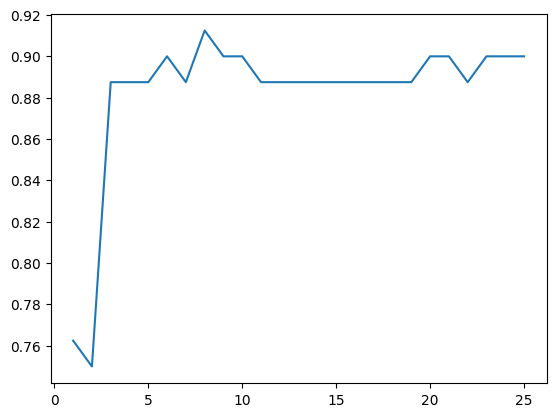

In [25]:
plt.plot(range(1,26),accuracy)

In [26]:
KNN = KNeighborsClassifier(n_neighbors=11)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [27]:
y_pred = KNN.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.8875

In [39]:
def predict_output():
       age = int(input("Enter the age"))
       salary = int(input("Enter the Salary"))

       X_New = np.array([[age],[salary]]).reshape(1,2)
       X_New = scaler.transform(X_New)
       
       if KNN.predict(X_New)[0]==0:
           return "Will Not Purchased"
       else :
             return "Will Purchased"

In [42]:
predict_output()

'Will Purchased'